# Atmospheric Gas Data Visualization 

$\textbf{Research Question:} $
Did California's COVID-19 Stay-At-Home orders have any impact on the amount of harmful gasses in the air in Vallejo, California?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Sulfur Dioxide data
SO2_df2019=pd.read_csv('SO2_2019.csv')
SO2_df2020=pd.read_csv('SO2_2020.csv')
SO2_df2021=pd.read_csv('SO2_2021.csv')

# Import Nitrogen Dioxide data
NO2_df2019=pd.read_csv('NO2_2019.csv')
NO2_df2020=pd.read_csv('NO2_2020.csv')
NO2_df2021=pd.read_csv('NO2_2021.csv')

# Import Ozone data
Ozone_df2019=pd.read_csv('Ozone_2019.csv')
Ozone_df2020=pd.read_csv('Ozone_2020.csv')
Ozone_df2021=pd.read_csv('Ozone_2021.csv')


# Combine the SO2 2019, 2020, and 2021 data 
SO2_5year=pd.concat([SO2_df2019,SO2_df2020,SO2_df2021])

# Makes columns for month and year
SO2_5year['Month']=pd.to_datetime(SO2_5year['Date']).dt.month
SO2_5year['Year']=pd.to_datetime(SO2_5year['Date']).dt.year
# Groups the data by monthly average
SO2_5year=SO2_5year.groupby(['Year','Month']).agg({'Daily Max 1-hour SO2 Concentration':np.mean})

# Combine the NO2 2019, 2020, and 2021 data 
NO2_5year=pd.concat([NO2_df2019,NO2_df2020,NO2_df2021])

# Makes columns for month and year
NO2_5year['Month']=pd.to_datetime(NO2_5year['Date']).dt.month
NO2_5year['Year']=pd.to_datetime(NO2_5year['Date']).dt.year
# Groups the data by monthly average
NO2_5year=NO2_5year.groupby(['Year','Month']).agg({'Daily Max 1-hour NO2 Concentration':np.mean})

# Selects only the Vallejo site data
Ozone_df2019=Ozone_df2019[Ozone_df2019['Site Name']=='Vallejo']
Ozone_df2020=Ozone_df2020[Ozone_df2020['Site Name']=='Vallejo']
Ozone_df2021=Ozone_df2021[Ozone_df2021['Site Name']=='Vallejo']

# Since our previous two gas dataframes range from the beginning of January 2019
# to the end of November 2021, we select only these dates from the Ozone data
Ozone_df2021['Date']=pd.to_datetime(Ozone_df2021['Date'])
Ozone_df2021=Ozone_df2021[Ozone_df2021['Date'].isin(pd.date_range('2021-01-01', '2021-11-30'))]

# Combine the Ozone 2019, 2020, and 2021 data 
Ozone_5year=pd.concat([Ozone_df2019,Ozone_df2020,Ozone_df2021])

# Makes columns for month and year
Ozone_5year['Date']=pd.to_datetime(Ozone_5year['Date'])
Ozone_5year['Month']=pd.to_datetime(Ozone_5year['Date']).dt.month
Ozone_5year['Year']=pd.to_datetime(Ozone_5year['Date']).dt.year
# Groups the data by monthly average
Ozone_5year=Ozone_5year.groupby(['Year','Month']).agg({'Daily Max 8-hour Ozone Concentration':np.mean})

<IPython.core.display.Javascript object>


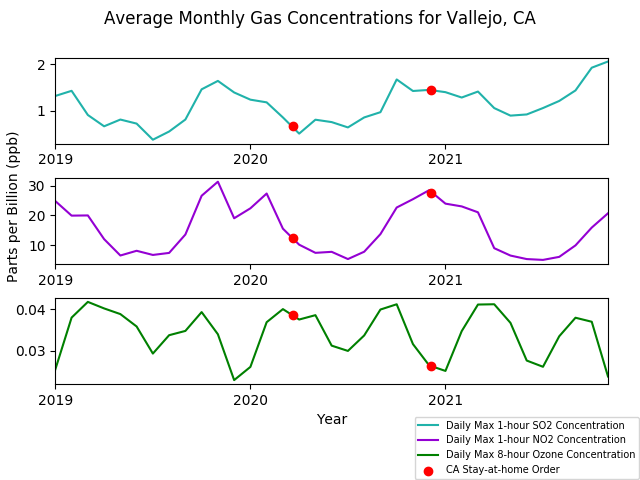

In [2]:
%matplotlib notebook 

# Creates a firgure with 3 subplots
fig,(ax1,ax2,ax3)=plt.subplots(3,sharex=True,)
x_axis=np.arange(1,36)
plt.xlim([1, 35])

# Plots the SO2, NO2, and Ozone data 
l1=ax1.plot(x_axis,SO2_5year['Daily Max 1-hour SO2 Concentration'], color='lightseagreen',zorder=1,
           label='Daily Max 1-hour SO2 Concentration')[0]
l2=ax2.plot(x_axis,NO2_5year['Daily Max 1-hour NO2 Concentration'],color='darkviolet',zorder=1,
           label='Daily Max 1-hour NO2 Concentration')[0]
l3=ax3.plot(x_axis,Ozone_5year['Daily Max 8-hour Ozone Concentration'],color='green',zorder=1,
           label='Daily Max 8-hour Ozone Concentration')[0]

plt.xticks([1,13,25], 
          ['2019','2020','2021'])

# Plots the dates when the stay-at-home orders occured
s1=ax1.scatter([15.6129,24.097],[0.6764,1.4405],color='red', marker='o',zorder=2)
s2=ax2.scatter([15.6129,24.097],[12.3992,27.6044],color='red', marker='o',zorder=2)
s3=ax3.scatter([15.6129,24.097],[0.0385,0.0264],color='red', marker='o',zorder=2)
         
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
        
# Creates a legend for the plot
line_labels=['Daily Max 1-hour SO2 Concentration','Daily Max 1-hour NO2 Concentration',
            'Daily Max 8-hour Ozone Concentration','CA Stay-at-home Order']        
fig.legend([l1, l2, l3,s1],     
           labels=line_labels,
           loc="lower right",   
           borderaxespad=0.1, prop={'size': 7})

# Common y axis label 
fig.text(0.022,0.57, "Parts per Billion (ppb)", ha="center", va="center",rotation=90)

plt.xlabel('Year')
fig.suptitle('Average Monthly Gas Concentrations for Vallejo, CA')

# Plot adjustments
fig.tight_layout()
plt.subplots_adjust(bottom=0.2,right=0.95)
fig.subplots_adjust(top=0.88)

plt.savefig('gas_concentrations.png')

$\textbf{Conclusion:}$ While we do see a decrease in gasses right after the stay-at-home orders were put into place, we can also observe that the amount of gas follows a pattern based on the month, with an increase during the winter months and a decrease during the summer months. It is difficult to know whether this was going to happen regardless of the lockdowns, but we can see it didn't have much of a long term effect, with the gasses returning to close to their pre-pandemic values.  